Using the titanic data, in your classification-exercises repository, create a notebook, model.ipynb where you will do the following:

What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

Evaluate your in-sample results using the model score, confusion matrix, and classification report.

Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

Run through steps 2-4 using a different max_depth value.

Which model performs better on your in-sample data?

Which model performs best on your out-of-sample data, the validate set?



## Titanic

In [71]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

import numpy as np

from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
import acquire

Using a decision tree classifier to predict survivial amongst passangers on the Titanic.

In [73]:
df = acquire.get_titanic_data()
df.head()

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


dropping unnecessary and duplicate columns

In [74]:
df = df.drop(['Unnamed: 0', 'passenger_id','pclass', 'deck', 'embarked'], axis=1)

encode dummy variables to make objects numeric 

In [75]:
dummy_df = pd.get_dummies(df[['sex', 'embark_town', 'class']], dummy_na=False, drop_first=[True, True, True])

In [76]:
df = pd.concat([dummy_df, df], axis=1)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sex_male                 891 non-null    uint8  
 1   embark_town_Queenstown   891 non-null    uint8  
 2   embark_town_Southampton  891 non-null    uint8  
 3   class_Second             891 non-null    uint8  
 4   class_Third              891 non-null    uint8  
 5   survived                 891 non-null    int64  
 6   sex                      891 non-null    object 
 7   age                      714 non-null    float64
 8   sibsp                    891 non-null    int64  
 9   parch                    891 non-null    int64  
 10  fare                     891 non-null    float64
 11  class                    891 non-null    object 
 12  embark_town              889 non-null    object 
 13  alone                    891 non-null    int64  
dtypes: float64(2), int64(4), o

drop the object columns before spliting data

In [78]:
df = df.drop(['sex', 'class','embark_town'], axis=1)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sex_male                 891 non-null    uint8  
 1   embark_town_Queenstown   891 non-null    uint8  
 2   embark_town_Southampton  891 non-null    uint8  
 3   class_Second             891 non-null    uint8  
 4   class_Third              891 non-null    uint8  
 5   survived                 891 non-null    int64  
 6   age                      714 non-null    float64
 7   sibsp                    891 non-null    int64  
 8   parch                    891 non-null    int64  
 9   fare                     891 non-null    float64
 10  alone                    891 non-null    int64  
dtypes: float64(2), int64(4), uint8(5)
memory usage: 46.2 KB


use train_validate_test_split function to split the data into three dataframes:

train- .70 * .80= 56% of the original dataset <br>
validate- .30 * .80= 24% of the original dataset <br>
test- 20% of the original dataset

Stratify the target variable (survived) to ensure subsets proportionally represent the
original dataframe

In [80]:
def train_validate_test_split(df, target, seed=123):
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed,
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3,
                                       random_state=seed,
                                       stratify=train_validate[target])
        
    return train, validate, test

In [81]:
train, validate, test = train_validate_test_split(df, target='survived')

In [82]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 583 to 744
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sex_male                 498 non-null    uint8  
 1   embark_town_Queenstown   498 non-null    uint8  
 2   embark_town_Southampton  498 non-null    uint8  
 3   class_Second             498 non-null    uint8  
 4   class_Third              498 non-null    uint8  
 5   survived                 498 non-null    int64  
 6   age                      401 non-null    float64
 7   sibsp                    498 non-null    int64  
 8   parch                    498 non-null    int64  
 9   fare                     498 non-null    float64
 10  alone                    498 non-null    int64  
dtypes: float64(2), int64(4), uint8(5)
memory usage: 29.7 KB


In [84]:
train.head()

,sex_male,embark_town_Queenstown,embark_town_Southampton,class_Second,class_Third,survived,age,sibsp,parch,fare,alone
583,1,0,0,0,0,0,36.0,0,0,40.1250,1
165,1,0,1,0,1,1,9.0,0,2,20.5250,0
50,1,0,1,0,1,0,7.0,4,1,39.6875,0
259,0,0,1,1,0,1,50.0,0,1,26.0000,0
306,0,0,0,0,0,1,NaN,0,0,110.8833,1


In [85]:
from sklearn.impute import SimpleImputer

use imputer function to fill null values in age column with the age mode in the train dataset and fill validate and test with the same mode

In [86]:
imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
type(imputer)

imputer = imputer.fit(train[['age']])
train[['age']] = imputer.transform(train[['age']])

In [87]:
train['age'].isna().sum()

0

In [88]:
validate[['age']] = imputer.transform(validate[['age']])
test[['age']] = imputer.transform(test[['age']])

In [56]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 583 to 744
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sex_male      498 non-null    uint8  
 1   class_Second  498 non-null    uint8  
 2   class_Third   498 non-null    uint8  
 3   survived      498 non-null    int64  
 4   sex           498 non-null    object 
 5   age           498 non-null    float64
 6   sibsp         498 non-null    int64  
 7   parch         498 non-null    int64  
 8   fare          498 non-null    float64
 9   class         498 non-null    object 
 10  embark_town   498 non-null    object 
 11  alone         498 non-null    int64  
dtypes: float64(2), int64(4), object(3), uint8(3)
memory usage: 40.4+ KB


Baseline prediction is NOT SURVIVED as this is the mode of survived

In [89]:
baseline_accuracy = ((train.survived == False).sum() / len(train.survived))
baseline_accuracy

0.6164658634538153

make subsets of survived (y) and all other columns (X) in order to create a decision tree
depiciting the potential impact of variables on survived

In [90]:
X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

In [91]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 583 to 744
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sex_male                 498 non-null    uint8  
 1   embark_town_Queenstown   498 non-null    uint8  
 2   embark_town_Southampton  498 non-null    uint8  
 3   class_Second             498 non-null    uint8  
 4   class_Third              498 non-null    uint8  
 5   age                      498 non-null    float64
 6   sibsp                    498 non-null    int64  
 7   parch                    498 non-null    int64  
 8   fare                     498 non-null    float64
 9   alone                    498 non-null    int64  
dtypes: float64(2), int64(3), uint8(5)
memory usage: 25.8 KB


decision tree with max depth of 3. The 3 variables with the highest statisical impact on 
survival will be used in the decision tree.

In [102]:
clf = DecisionTreeClassifier(max_depth=3, random_state=123)

In [103]:
clf = clf.fit(X_train, y_train)

[Text(558.0, 475.65000000000003, 'sex_male <= 0.5\ngini = 0.473\nsamples = 498\nvalue = [307, 191]'),
 Text(279.0, 339.75, 'class_Third <= 0.5\ngini = 0.365\nsamples = 175\nvalue = [42, 133]'),
 Text(139.5, 203.85000000000002, 'age <= 3.0\ngini = 0.081\nsamples = 94\nvalue = [4, 90]'),
 Text(69.75, 67.94999999999999, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(209.25, 67.94999999999999, 'gini = 0.062\nsamples = 93\nvalue = [3, 90]'),
 Text(418.5, 203.85000000000002, 'fare <= 23.912\ngini = 0.498\nsamples = 81\nvalue = [38, 43]'),
 Text(348.75, 67.94999999999999, 'gini = 0.476\nsamples = 69\nvalue = [27, 42]'),
 Text(488.25, 67.94999999999999, 'gini = 0.153\nsamples = 12\nvalue = [11, 1]'),
 Text(837.0, 339.75, 'fare <= 18.275\ngini = 0.295\nsamples = 323\nvalue = [265, 58]'),
 Text(697.5, 203.85000000000002, 'age <= 7.835\ngini = 0.184\nsamples = 205\nvalue = [184, 21]'),
 Text(627.75, 67.94999999999999, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(767.25, 67.94999999999999,

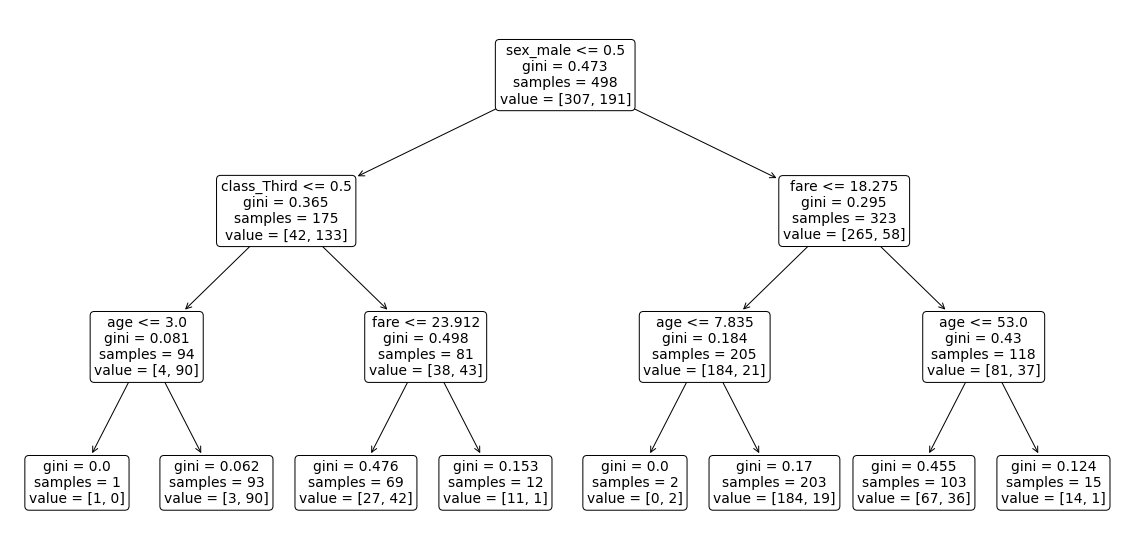

In [109]:
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X_train.columns, rounded=True)

Based on the decision tree visualization, sex is the highest predictor of survivial. <br>
Males - lower than 18.28 fare, age greater than 7.9 are most likely to died <br>
If female, third class, and then having a fare greater than 23.9 makes most likely to die <br>

note- I am not sure how much the fare cost would matter after determining what ticket class
the passanger has, but for the purpose of thorough modeling, fare will be included in this first model

In [110]:
y_pred = clf.predict(X_train)
y_pred[0:5]

array([0, 0, 0, 1, 1])

In [111]:
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:5]

array([[0.65048544, 0.34951456],
       [0.65048544, 0.34951456],
       [0.65048544, 0.34951456],
       [0.03225806, 0.96774194],
       [0.03225806, 0.96774194]])

In [112]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.83


In [113]:
confusion_matrix(y_train, y_pred)

array([[277,  30],
       [ 57, 134]])

In [114]:
y_train.value_counts()

0    307
1    191
Name: survived, dtype: int64

In [116]:
labels = sorted(y_train.unique())

pd.DataFrame(confusion_matrix(y_train, y_pred), index=['predict_died', 'predict_survived'], columns=['actual_died', 'actual survived'])

,actual_died,actual survived
predict_died,277,30
predict_survived,57,134


In [117]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       307
           1       0.82      0.70      0.75       191

    accuracy                           0.83       498
   macro avg       0.82      0.80      0.81       498
weighted avg       0.82      0.83      0.82       498



In [118]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(clf.score(X_validate, y_validate)))

Accuracy of Decision Tree classifier on validate set: 0.80


interpretation of model - the accuracy on the train dataset is 83% and on validate, 80%. Because
there is only a slight difference in accuracy, this model likely is not overfitting.

In [120]:
y_pred = clf.predict(X_validate)
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       132
           1       0.77      0.67      0.72        82

    accuracy                           0.80       214
   macro avg       0.79      0.77      0.78       214
weighted avg       0.80      0.80      0.80       214



[Text(523.125, 504.7714285714286, 'sex_male <= 0.5\ngini = 0.473\nsamples = 498\nvalue = [307, 191]'),
 Text(238.6184210526316, 427.11428571428576, 'class_Third <= 0.5\ngini = 0.365\nsamples = 175\nvalue = [42, 133]'),
 Text(88.10526315789474, 349.4571428571429, 'age <= 3.0\ngini = 0.081\nsamples = 94\nvalue = [4, 90]'),
 Text(58.73684210526316, 271.8, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(117.47368421052632, 271.8, 'fare <= 28.856\ngini = 0.062\nsamples = 93\nvalue = [3, 90]'),
 Text(88.10526315789474, 194.14285714285717, 'fare <= 28.231\ngini = 0.133\nsamples = 42\nvalue = [3, 39]'),
 Text(58.73684210526316, 116.48571428571432, 'age <= 27.5\ngini = 0.093\nsamples = 41\nvalue = [2, 39]'),
 Text(29.36842105263158, 38.82857142857142, 'gini = 0.208\nsamples = 17\nvalue = [2, 15]'),
 Text(88.10526315789474, 38.82857142857142, 'gini = 0.0\nsamples = 24\nvalue = [0, 24]'),
 Text(117.47368421052632, 116.48571428571432, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(146.8421052

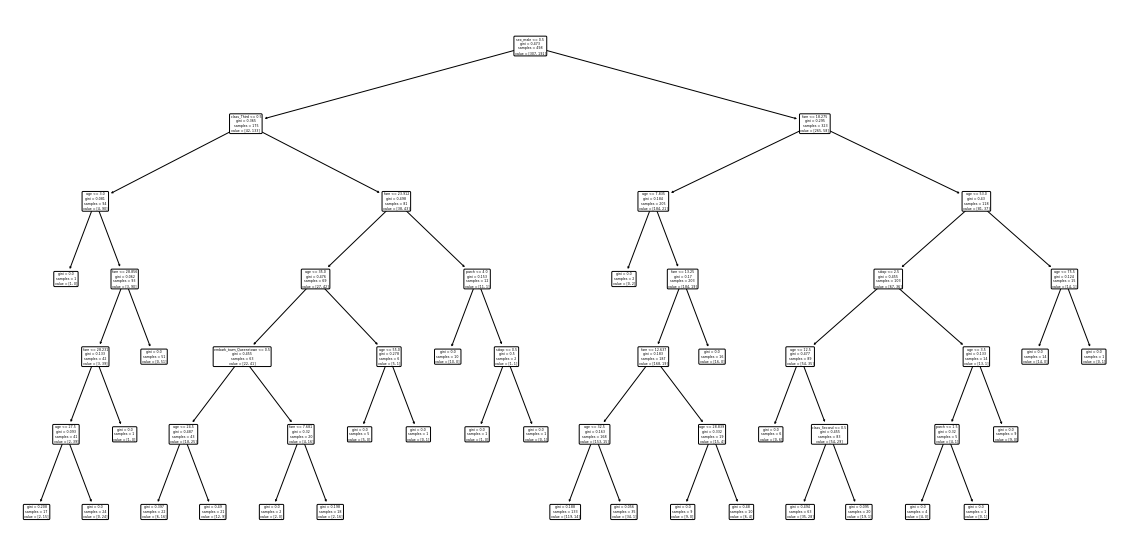

In [121]:
clf = DecisionTreeClassifier(max_depth=6, random_state=123)
clf = clf.fit(X_train, y_train)
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X_train.columns, rounded=True)

In [122]:
y_pred = clf.predict(X_train)
y_pred[0:5]

array([0, 1, 0, 1, 1])

In [123]:
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:5]

array([[0.55555556, 0.44444444],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ]])

In [124]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.87


In [125]:
confusion_matrix(y_train, y_pred)

array([[297,  10],
       [ 57, 134]])

In [126]:
labels = sorted(y_train.unique())

pd.DataFrame(confusion_matrix(y_train, y_pred), index=['predict_died', 'predict_survived'], columns=['actual_died', 'actual survived'])

,actual_died,actual survived
predict_died,297,10
predict_survived,57,134


In [127]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90       307
           1       0.93      0.70      0.80       191

    accuracy                           0.87       498
   macro avg       0.88      0.83      0.85       498
weighted avg       0.87      0.87      0.86       498



In [128]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(clf.score(X_validate, y_validate)))

Accuracy of Decision Tree classifier on validate set: 0.79


In [129]:
y_pred = clf.predict(X_validate)
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       132
           1       0.76      0.63      0.69        82

    accuracy                           0.79       214
   macro avg       0.78      0.76      0.76       214
weighted avg       0.78      0.79      0.78       214



When changing the max_depth from 3 to 6 overfits the model as the accuracy drops 10% 
from the train dataset to the validate dataset. The first model (max_depth=3) is better
as overall accuracy is 83% in train and 80% in validate. This indicates overfitting is
not very present in the first model.

## Telco

Using a decision tree classifier to make a model predicting customer churn.

In [130]:
df = acquire.get_telco_data()

In [131]:
df.head()

,Unnamed: 0,contract_type_id,payment_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,payment_type,contract_type
0,0,2,2,1,0002-ORFBO,Female,0,Yes,Yes,9,...,Yes,Yes,No,Yes,65.6,593.3,No,DSL,Mailed check,One year
1,1,1,2,1,0003-MKNFE,Male,0,No,No,9,...,No,No,Yes,No,59.9,542.4,No,DSL,Mailed check,Month-to-month
2,2,1,1,2,0004-TLHLJ,Male,0,No,No,4,...,No,No,No,Yes,73.9,280.85,Yes,Fiber optic,Electronic check,Month-to-month
3,3,1,1,2,0011-IGKFF,Male,1,Yes,No,13,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Fiber optic,Electronic check,Month-to-month
4,4,1,2,2,0013-EXCHZ,Female,1,Yes,No,3,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Fiber optic,Mailed check,Month-to-month


Use prep_telco function to begin cleaning data. This will drop columns that wouldn't be appropriate for the model and create dummy variables to change object types to numeric. 

In [134]:
def prep_telco(df):
    df = df.drop(['Unnamed: 0', 'customer_id'], axis=1)
    dummy = pd.get_dummies(df[['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines',
                  'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing',
                  'churn', 'internet_service_type', 'payment_type', 'contract_type']],
              dummy_na=False, drop_first=[True, True, True, True, True, True, True, True, True, True, True, True, True])
    df = pd.concat([dummy, df], axis=1)
    return df

In [136]:
df = prep_telco(df)

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 44 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   gender_Male                           7043 non-null   uint8  
 1   partner_Yes                           7043 non-null   uint8  
 2   dependents_Yes                        7043 non-null   uint8  
 3   phone_service_Yes                     7043 non-null   uint8  
 4   multiple_lines_No phone service       7043 non-null   uint8  
 5   multiple_lines_Yes                    7043 non-null   uint8  
 6   tech_support_No internet service      7043 non-null   uint8  
 7   tech_support_Yes                      7043 non-null   uint8  
 8   streaming_tv_No internet service      7043 non-null   uint8  
 9   streaming_tv_Yes                      7043 non-null   uint8  
 10  streaming_movies_No internet service  7043 non-null   uint8  
 11  streaming_movies_

Now that dummy variable columns have been created, dropping object colunns so that all data types are numeric.

In [161]:
df.dtypes[df.dtypes == "object"]

gender                   object
partner                  object
dependents               object
phone_service            object
multiple_lines           object
online_security          object
online_backup            object
device_protection        object
tech_support             object
streaming_tv             object
streaming_movies         object
paperless_billing        object
total_charges            object
churn                    object
internet_service_type    object
payment_type             object
contract_type            object
dtype: object

In [164]:
df = df.drop(['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines',
         'online_security', 'online_backup', 'device_protection', 'tech_support',
         'streaming_tv', 'streaming_movies', 'paperless_billing', 'churn', 'internet_service_type',
         'payment_type', 'contract_type'], axis=1)

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   gender_Male                           7043 non-null   uint8  
 1   partner_Yes                           7043 non-null   uint8  
 2   dependents_Yes                        7043 non-null   uint8  
 3   phone_service_Yes                     7043 non-null   uint8  
 4   multiple_lines_No phone service       7043 non-null   uint8  
 5   multiple_lines_Yes                    7043 non-null   uint8  
 6   tech_support_No internet service      7043 non-null   uint8  
 7   tech_support_Yes                      7043 non-null   uint8  
 8   streaming_tv_No internet service      7043 non-null   uint8  
 9   streaming_tv_Yes                      7043 non-null   uint8  
 10  streaming_movies_No internet service  7043 non-null   uint8  
 11  streaming_movies_

The total_charges is still an object and needs to be converted

In [174]:
df.iloc[945]

gender_Male                                 0
partner_Yes                                 1
dependents_Yes                              1
phone_service_Yes                           0
multiple_lines_No phone service             1
multiple_lines_Yes                          0
tech_support_No internet service            0
tech_support_Yes                            1
streaming_tv_No internet service            0
streaming_tv_Yes                            1
streaming_movies_No internet service        0
streaming_movies_Yes                        0
paperless_billing_Yes                       0
churn_Yes                                   0
internet_service_type_Fiber optic           0
internet_service_type_None                  0
payment_type_Credit card (automatic)        1
payment_type_Electronic check               0
payment_type_Mailed check                   0
contract_type_One year                      0
contract_type_Two year                      1
contract_type_id                  

In [176]:
df = df.drop(df.index[945])

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7042 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   gender_Male                           7042 non-null   uint8  
 1   partner_Yes                           7042 non-null   uint8  
 2   dependents_Yes                        7042 non-null   uint8  
 3   phone_service_Yes                     7042 non-null   uint8  
 4   multiple_lines_No phone service       7042 non-null   uint8  
 5   multiple_lines_Yes                    7042 non-null   uint8  
 6   tech_support_No internet service      7042 non-null   uint8  
 7   tech_support_Yes                      7042 non-null   uint8  
 8   streaming_tv_No internet service      7042 non-null   uint8  
 9   streaming_tv_Yes                      7042 non-null   uint8  
 10  streaming_movies_No internet service  7042 non-null   uint8  
 11  streaming_movies_

In [179]:
df['total_charges'] = pd.to_numeric(df['total_charges'], errors='coerce')
df.total_charges

0        593.30
1        542.40
2        280.85
3       1237.85
4        267.40
         ...   
7038     742.90
7039    1873.70
7040      92.75
7041    4627.65
7042    3707.60
Name: total_charges, Length: 7042, dtype: float64

In [180]:
df.total_charges.isna().sum()

10

After changing data type of total_charges to float, there are 10 null values (11 before dropping first null row). All of these null values are in rows with new customers (represented by 0 tenure). Brand new customers would not have any significance to determine churn so dropping these rows.

In [181]:
df.dropna(subset=['total_charges'], inplace=True)

In [182]:
df.isna().sum()

gender_Male                             0
partner_Yes                             0
dependents_Yes                          0
phone_service_Yes                       0
multiple_lines_No phone service         0
multiple_lines_Yes                      0
tech_support_No internet service        0
tech_support_Yes                        0
streaming_tv_No internet service        0
streaming_tv_Yes                        0
streaming_movies_No internet service    0
streaming_movies_Yes                    0
paperless_billing_Yes                   0
churn_Yes                               0
internet_service_type_Fiber optic       0
internet_service_type_None              0
payment_type_Credit card (automatic)    0
payment_type_Electronic check           0
payment_type_Mailed check               0
contract_type_One year                  0
contract_type_Two year                  0
contract_type_id                        0
payment_type_id                         0
internet_service_type_id          

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   gender_Male                           7032 non-null   uint8  
 1   partner_Yes                           7032 non-null   uint8  
 2   dependents_Yes                        7032 non-null   uint8  
 3   phone_service_Yes                     7032 non-null   uint8  
 4   multiple_lines_No phone service       7032 non-null   uint8  
 5   multiple_lines_Yes                    7032 non-null   uint8  
 6   tech_support_No internet service      7032 non-null   uint8  
 7   tech_support_Yes                      7032 non-null   uint8  
 8   streaming_tv_No internet service      7032 non-null   uint8  
 9   streaming_tv_Yes                      7032 non-null   uint8  
 10  streaming_movies_No internet service  7032 non-null   uint8  
 11  streaming_movies_

use train_validate_test_split function to split the data into three dataframes:

train- .70 * .80= 56% of the original dataset <br>
validate- .30 * .80= 24% of the original dataset <br>
test- 20% of the original dataset <br>

Stratify the target variable ('churn_Yes') to ensure subsets proportionally represent the original dataframe <br>

Note: churn_Yes - <br>
    1 = has churned <br>
    0 = has no churned

In [185]:
def train_validate_test_split(df, target, seed=123):
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed,
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3,
                                       random_state=seed,
                                       stratify=train_validate[target])
        
    return train, validate, test

In [196]:
train, validate, test = train_validate_test_split(df, target='churn_Yes', seed=123)
train.shape, validate.shape, test.shape

((3937, 28), (1688, 28), (1407, 28))

In [199]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3937 entries, 5919 to 4192
Data columns (total 28 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   gender_Male                           3937 non-null   uint8  
 1   partner_Yes                           3937 non-null   uint8  
 2   dependents_Yes                        3937 non-null   uint8  
 3   phone_service_Yes                     3937 non-null   uint8  
 4   multiple_lines_No phone service       3937 non-null   uint8  
 5   multiple_lines_Yes                    3937 non-null   uint8  
 6   tech_support_No internet service      3937 non-null   uint8  
 7   tech_support_Yes                      3937 non-null   uint8  
 8   streaming_tv_No internet service      3937 non-null   uint8  
 9   streaming_tv_Yes                      3937 non-null   uint8  
 10  streaming_movies_No internet service  3937 non-null   uint8  
 11  streaming_movi

In [217]:
train.contract_type_id.value_counts()

1    2165
3     957
2     815
Name: contract_type_id, dtype: int64

In [200]:
baseline_accuracy = ((train.churn_Yes == 0).sum() / len(train.churn_Yes))
baseline_accuracy
# 73.4% of customers do not churn on baseline accuracy

0.7343154686309372

In [202]:
X_train = train.drop(columns=['churn_Yes'])
y_train = train.churn_Yes

X_validate = validate.drop(columns=['churn_Yes'])
y_validate = validate.churn_Yes

X_test = test.drop(columns=['churn_Yes'])
y_test = test.churn_Yes

First decision tree max_depth = 2. This will show 2 levels of variables with the top and then second most statisically significant predictors of churn. This is a starting point and will be necessary to increase the max depth to determine the appropriate amount of levels without overfitting.

[Text(362.7, 317.09999999999997, 'contract_type_id <= 1.5\ngini = 0.39\nsamples = 3937\nvalue = [2891, 1046]\nclass = 0'),
 Text(181.35, 190.26, 'internet_service_type_Fiber optic <= 0.5\ngini = 0.49\nsamples = 2165\nvalue = [1238, 927]\nclass = 0'),
 Text(90.675, 63.420000000000016, 'gini = 0.394\nsamples = 999\nvalue = [730, 269]\nclass = 0'),
 Text(272.025, 63.420000000000016, 'gini = 0.492\nsamples = 1166\nvalue = [508, 658]\nclass = 1'),
 Text(544.05, 190.26, 'monthly_charges <= 93.775\ngini = 0.125\nsamples = 1772\nvalue = [1653, 119]\nclass = 0'),
 Text(453.375, 63.420000000000016, 'gini = 0.072\nsamples = 1328\nvalue = [1278, 50]\nclass = 0'),
 Text(634.725, 63.420000000000016, 'gini = 0.263\nsamples = 444\nvalue = [375, 69]\nclass = 0')]

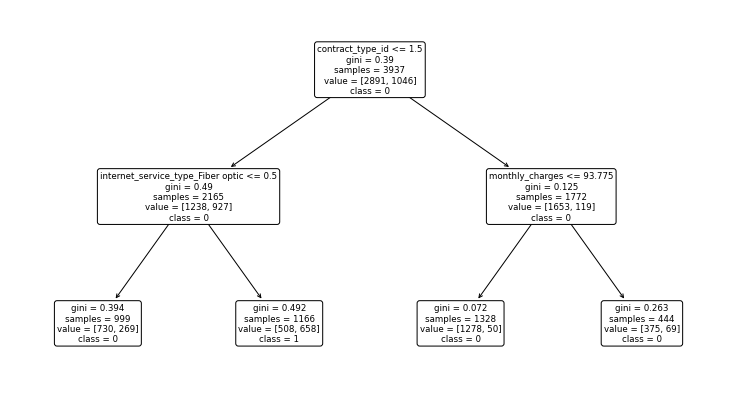

In [204]:
clf_1 = DecisionTreeClassifier(max_depth=2, random_state=123)
clf_1 = clf_1.fit(X_train, y_train)
plt.figure(figsize=(13, 7))
plot_tree(clf_1, feature_names=X_train.columns, class_names = clf.classes_.astype(str), rounded=True)

In [275]:
train.contract_type_id.value_counts()

1    2165
3     957
2     815
Name: contract_type_id, dtype: int64

Based on the decision tree, the contract type is the top predictor of churn. <br>

contract_type_id code for numeric values: <br>
    1 month-to-month contract <br>
    2 one year contract <br>
    3 two year contract <br>

In value = [ ], the left value indictes NOT CHURNED and the right value indicated CHURNED

In [206]:
y_pred = clf_1.predict(X_train)
y_pred_proba = clf_1.predict_proba(X_train)

y_pred[0:5], y_pred_proba[0:5]

(array([0, 0, 0, 0, 0], dtype=uint8),
 array([[0.9623494 , 0.0376506 ],
        [0.9623494 , 0.0376506 ],
        [0.73073073, 0.26926927],
        [0.73073073, 0.26926927],
        [0.9623494 , 0.0376506 ]]))

In [207]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf_1.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.77


Accurary of this decision tree on train subset is 77%. It'd be ideal to have greater accuracy without overfitting model which may be possible with increasing max depth.

In [208]:
confusion_matrix(y_train, y_pred)

array([[2383,  508],
       [ 388,  658]])

In [209]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      2891
           1       0.56      0.63      0.59      1046

    accuracy                           0.77      3937
   macro avg       0.71      0.73      0.72      3937
weighted avg       0.78      0.77      0.78      3937



In [211]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(clf_1.score(X_validate, y_validate)))

Accuracy of Decision Tree classifier on validate set: 0.74


In [213]:
y_pred = clf_1.predict(X_validate)

print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82      1239
           1       0.51      0.61      0.55       449

    accuracy                           0.74      1688
   macro avg       0.68      0.70      0.68      1688
weighted avg       0.76      0.74      0.75      1688



### Model 2

[Text(837.0, 475.65000000000003, 'contract_type_id <= 1.5\ngini = 0.39\nsamples = 3937\nvalue = [2891, 1046]\nclass = 0'),
 Text(418.5, 339.75, 'internet_service_type_Fiber optic <= 0.5\ngini = 0.49\nsamples = 2165\nvalue = [1238, 927]\nclass = 0'),
 Text(209.25, 203.85000000000002, 'tenure <= 5.5\ngini = 0.394\nsamples = 999\nvalue = [730, 269]\nclass = 0'),
 Text(104.625, 67.94999999999999, 'gini = 0.486\nsamples = 439\nvalue = [256, 183]\nclass = 0'),
 Text(313.875, 67.94999999999999, 'gini = 0.26\nsamples = 560\nvalue = [474, 86]\nclass = 0'),
 Text(627.75, 203.85000000000002, 'total_charges <= 1486.825\ngini = 0.492\nsamples = 1166\nvalue = [508, 658]\nclass = 1'),
 Text(523.125, 67.94999999999999, 'gini = 0.409\nsamples = 587\nvalue = [168, 419]\nclass = 1'),
 Text(732.375, 67.94999999999999, 'gini = 0.485\nsamples = 579\nvalue = [340, 239]\nclass = 0'),
 Text(1255.5, 339.75, 'monthly_charges <= 93.775\ngini = 0.125\nsamples = 1772\nvalue = [1653, 119]\nclass = 0'),
 Text(1046.25

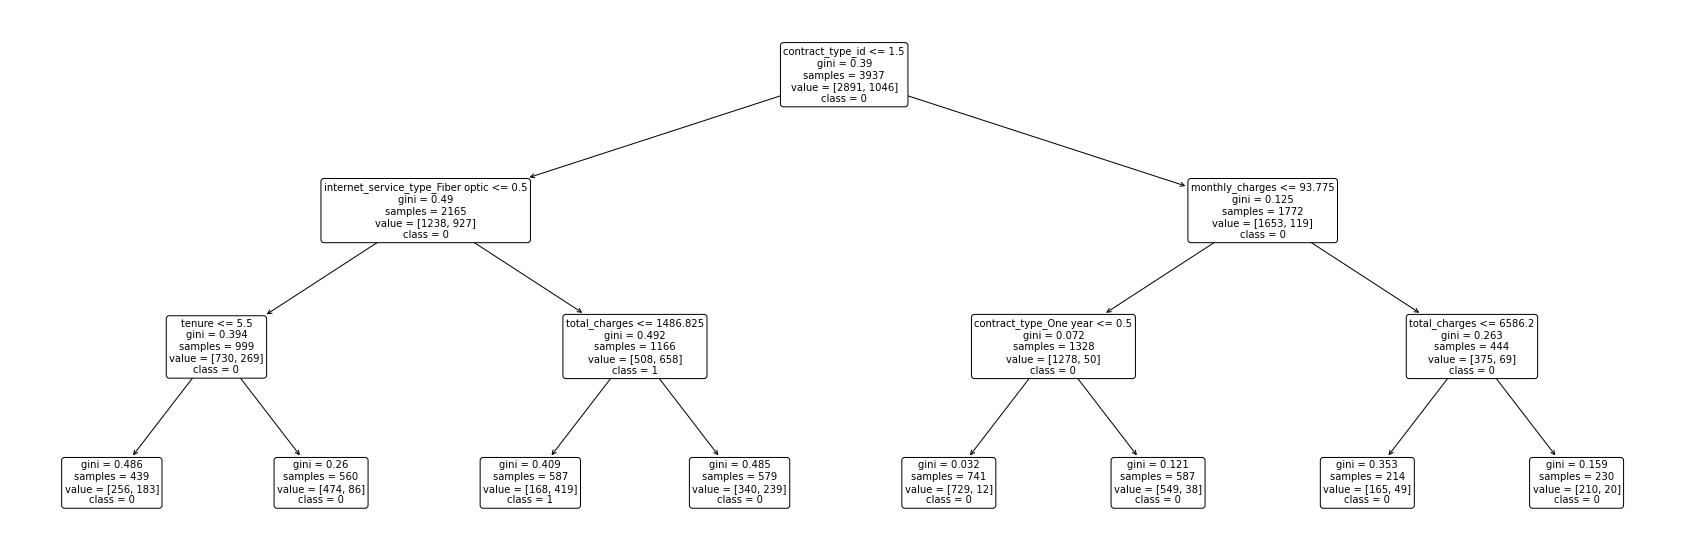

In [227]:
clf_2 = DecisionTreeClassifier(max_depth=3, random_state=123)
clf_2 = clf_2.fit(X_train, y_train)
plt.figure(figsize=(30, 10))
plot_tree(clf_2, feature_names=X_train.columns, class_names = clf.classes_.astype(str), rounded=True)

In [228]:
y_pred = clf_2.predict(X_train)
y_pred_proba = clf_2.predict_proba(X_train)

y_pred[0:5], y_pred_proba[0:5]

(array([0, 0, 0, 0, 0], dtype=uint8),
 array([[0.93526405, 0.06473595],
        [0.93526405, 0.06473595],
        [0.84642857, 0.15357143],
        [0.58314351, 0.41685649],
        [0.93526405, 0.06473595]]))

In [229]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf_2.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.80


In [230]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      2891
           1       0.71      0.40      0.51      1046

    accuracy                           0.80      3937
   macro avg       0.76      0.67      0.69      3937
weighted avg       0.79      0.80      0.78      3937



In [231]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(clf_2.score(X_validate, y_validate)))

Accuracy of Decision Tree classifier on validate set: 0.77


In [232]:
y_pred = clf_2.predict(X_validate)

print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.91      0.86      1239
           1       0.62      0.39      0.48       449

    accuracy                           0.77      1688
   macro avg       0.71      0.65      0.67      1688
weighted avg       0.75      0.77      0.75      1688



In [219]:
### Model 3

In [269]:
validate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1688 entries, 816 to 3718
Data columns (total 28 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   gender_Male                           1688 non-null   uint8  
 1   partner_Yes                           1688 non-null   uint8  
 2   dependents_Yes                        1688 non-null   uint8  
 3   phone_service_Yes                     1688 non-null   uint8  
 4   multiple_lines_No phone service       1688 non-null   uint8  
 5   multiple_lines_Yes                    1688 non-null   uint8  
 6   tech_support_No internet service      1688 non-null   uint8  
 7   tech_support_Yes                      1688 non-null   uint8  
 8   streaming_tv_No internet service      1688 non-null   uint8  
 9   streaming_tv_Yes                      1688 non-null   uint8  
 10  streaming_movies_No internet service  1688 non-null   uint8  
 11  streaming_movie

[Text(1534.5, 489.24, 'contract_type_id <= 1.5\ngini = 0.39\nsamples = 3937\nvalue = [2891, 1046]\nclass = 0'),
 Text(767.25, 380.52000000000004, 'internet_service_type_Fiber optic <= 0.5\ngini = 0.49\nsamples = 2165\nvalue = [1238, 927]\nclass = 0'),
 Text(383.625, 271.8, 'tenure <= 5.5\ngini = 0.394\nsamples = 999\nvalue = [730, 269]\nclass = 0'),
 Text(191.8125, 163.08000000000004, 'internet_service_type_id <= 2.0\ngini = 0.486\nsamples = 439\nvalue = [256, 183]\nclass = 0'),
 Text(95.90625, 54.360000000000014, 'gini = 0.5\nsamples = 266\nvalue = [129, 137]\nclass = 1'),
 Text(287.71875, 54.360000000000014, 'gini = 0.39\nsamples = 173\nvalue = [127, 46]\nclass = 0'),
 Text(575.4375, 163.08000000000004, 'phone_service_Yes <= 0.5\ngini = 0.26\nsamples = 560\nvalue = [474, 86]\nclass = 0'),
 Text(479.53125, 54.360000000000014, 'gini = 0.419\nsamples = 114\nvalue = [80, 34]\nclass = 0'),
 Text(671.34375, 54.360000000000014, 'gini = 0.206\nsamples = 446\nvalue = [394, 52]\nclass = 0'),
 

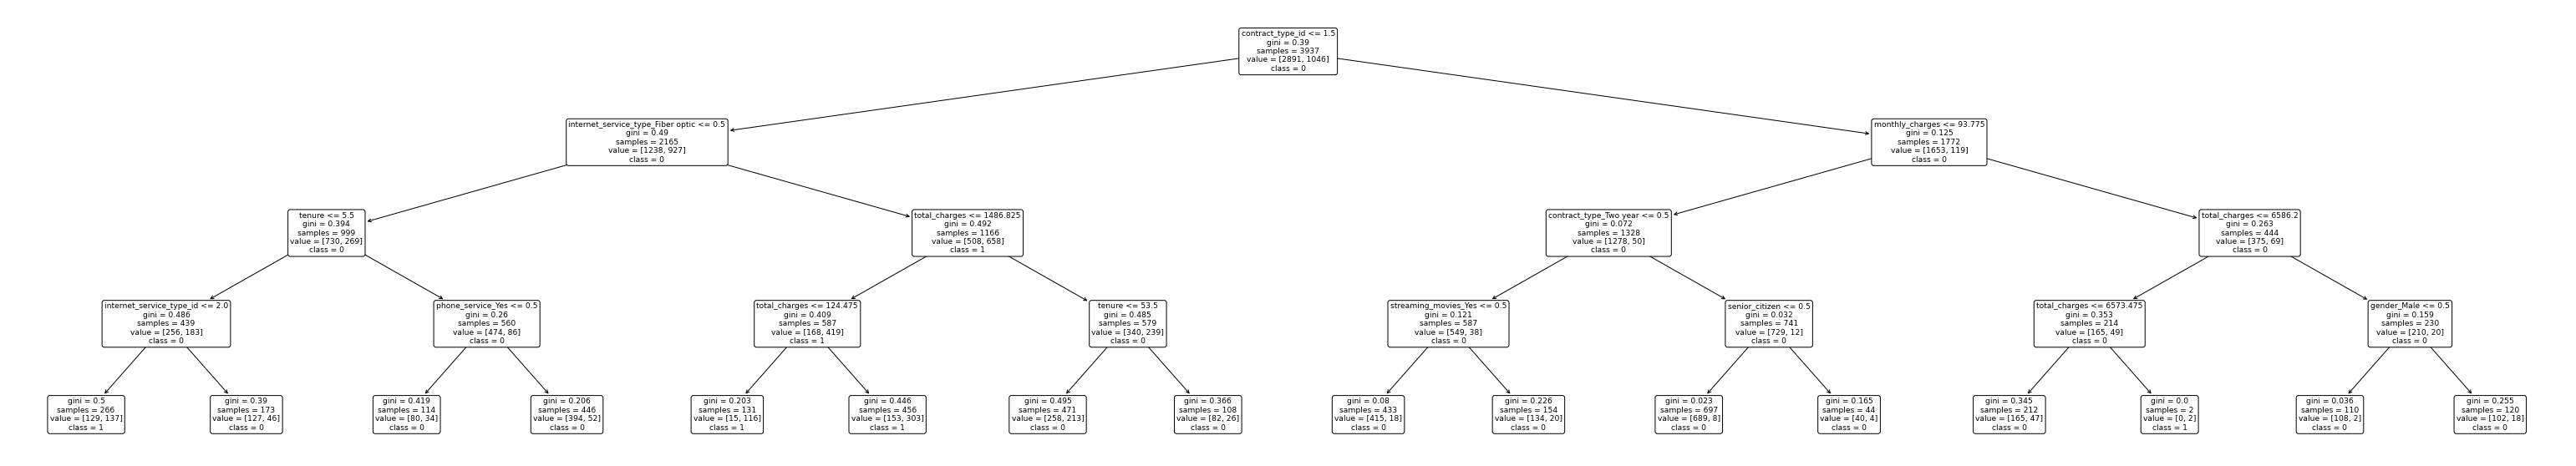

In [237]:
clf_3 = DecisionTreeClassifier(max_depth=4, random_state=123)
clf_3 = clf_3.fit(X_train, y_train)
plt.figure(figsize=(55, 10))
plot_tree(clf_3, feature_names=X_train.columns, class_names = clf.classes_.astype(str), rounded=True)

In [238]:
y_pred = clf_3.predict(X_train)
y_pred_proba = clf_3.predict_proba(X_train)

y_pred[0:5], y_pred_proba[0:5]

(array([0, 0, 0, 0, 0], dtype=uint8),
 array([[0.95842956, 0.04157044],
        [0.95842956, 0.04157044],
        [0.88340807, 0.11659193],
        [0.73410405, 0.26589595],
        [0.95842956, 0.04157044]]))

In [239]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf_3.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.80


In [240]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      2891
           1       0.65      0.53      0.59      1046

    accuracy                           0.80      3937
   macro avg       0.75      0.72      0.73      3937
weighted avg       0.79      0.80      0.79      3937



In [241]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(clf_3.score(X_validate, y_validate)))

Accuracy of Decision Tree classifier on validate set: 0.77


In [242]:
y_pred = clf_3.predict(X_validate)

print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1239
           1       0.58      0.51      0.54       449

    accuracy                           0.77      1688
   macro avg       0.71      0.69      0.70      1688
weighted avg       0.76      0.77      0.77      1688



In [ ]:
### Model 4

Model 4 max depth is 8. This may be extreme on the higher end, but will see if there is overfitting and to what degree to have a better idea of what may be an appropriate max depth

[Text(1921.8570110701107, 359.38, 'contract_type_id <= 1.5\ngini = 0.39\nsamples = 3937\nvalue = [2891, 1046]\nclass = 0'),
 Text(1104.5465867158673, 317.09999999999997, 'internet_service_type_Fiber optic <= 0.5\ngini = 0.49\nsamples = 2165\nvalue = [1238, 927]\nclass = 0'),
 Text(637.0156826568266, 274.82, 'tenure <= 5.5\ngini = 0.394\nsamples = 999\nvalue = [730, 269]\nclass = 0'),
 Text(328.93173431734317, 232.53999999999996, 'internet_service_type_id <= 2.0\ngini = 0.486\nsamples = 439\nvalue = [256, 183]\nclass = 0'),
 Text(169.8708487084871, 190.26, 'senior_citizen <= 0.5\ngini = 0.5\nsamples = 266\nvalue = [129, 137]\nclass = 1'),
 Text(98.8339483394834, 147.97999999999996, 'monthly_charges <= 60.625\ngini = 0.5\nsamples = 238\nvalue = [122, 116]\nclass = 0'),
 Text(49.4169741697417, 105.69999999999999, 'paperless_billing_Yes <= 0.5\ngini = 0.5\nsamples = 214\nvalue = [104, 110]\nclass = 1'),
 Text(24.70848708487085, 63.41999999999996, 'monthly_charges <= 24.725\ngini = 0.489\ns

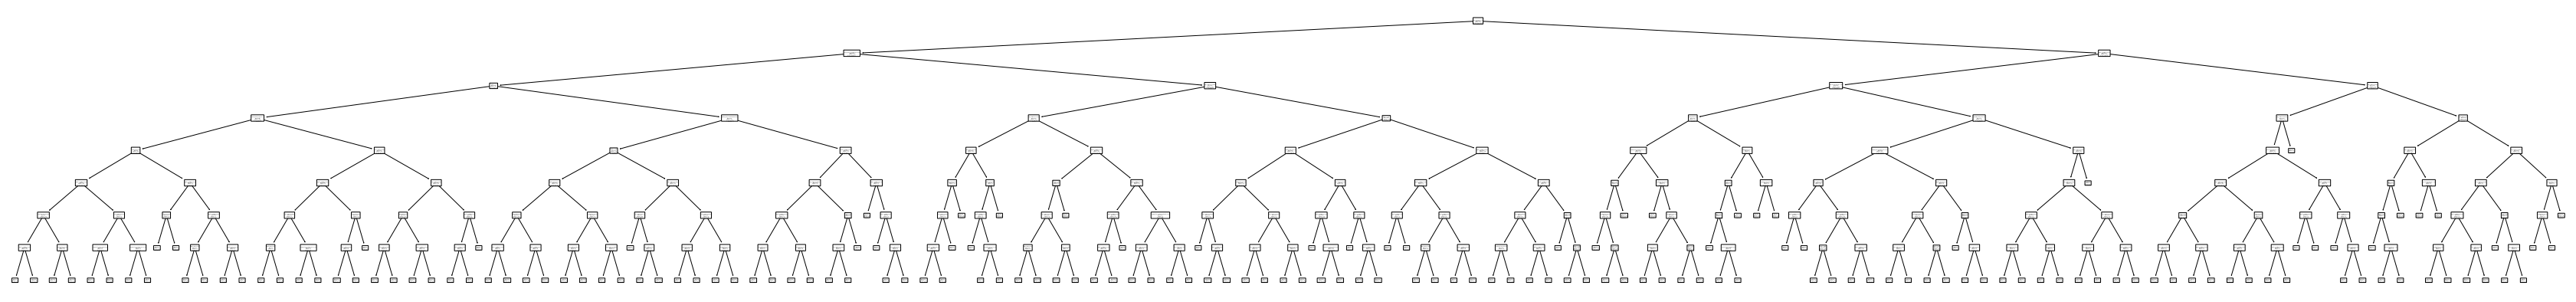

In [260]:
clf_4 = DecisionTreeClassifier(max_depth=8, random_state=123)
clf_4 = clf_4.fit(X_train, y_train)
plt.figure(figsize=(60, 7))
plot_tree(clf_4, feature_names=X_train.columns, class_names = clf.classes_.astype(str), rounded=True)

In [261]:
y_pred = clf_4.predict(X_train)
y_pred_proba = clf_4.predict_proba(X_train)

y_pred[0:5], y_pred_proba[0:5]

(array([0, 0, 0, 0, 0], dtype=uint8),
 array([[0.96335079, 0.03664921],
        [0.96335079, 0.03664921],
        [0.93706294, 0.06293706],
        [1.        , 0.        ],
        [0.96335079, 0.03664921]]))

In [262]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf_4.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.85


In [263]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      2891
           1       0.72      0.72      0.72      1046

    accuracy                           0.85      3937
   macro avg       0.81      0.81      0.81      3937
weighted avg       0.85      0.85      0.85      3937



In [264]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(clf_4.score(X_validate, y_validate)))

Accuracy of Decision Tree classifier on validate set: 0.76


The accuracy on this model is 85%, but a 9% difference in the accuracy on the validate set. Because of this difference, this model is likely overfitting and max_depth should be lowered to avoid this.


In [265]:
y_pred = clf_4.predict(X_validate)

print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1239
           1       0.54      0.59      0.56       449

    accuracy                           0.76      1688
   macro avg       0.69      0.70      0.70      1688
weighted avg       0.76      0.76      0.76      1688



In [ ]:
### Model 5

[Text(379.32375, 348.81, 'contract_type_id <= 1.5\ngini = 0.39\nsamples = 3937\nvalue = [2891, 1046]\nclass = 0'),
 Text(193.44, 285.39, 'internet_service_type_Fiber optic <= 0.5\ngini = 0.49\nsamples = 2165\nvalue = [1238, 927]\nclass = 0'),
 Text(96.72, 221.97, 'tenure <= 5.5\ngini = 0.394\nsamples = 999\nvalue = [730, 269]\nclass = 0'),
 Text(48.36, 158.55, 'internet_service_type_id <= 2.0\ngini = 0.486\nsamples = 439\nvalue = [256, 183]\nclass = 0'),
 Text(24.18, 95.13, 'senior_citizen <= 0.5\ngini = 0.5\nsamples = 266\nvalue = [129, 137]\nclass = 1'),
 Text(12.09, 31.710000000000036, 'gini = 0.5\nsamples = 238\nvalue = [122, 116]\nclass = 0'),
 Text(36.269999999999996, 31.710000000000036, 'gini = 0.375\nsamples = 28\nvalue = [7, 21]\nclass = 1'),
 Text(72.53999999999999, 95.13, 'total_charges <= 20.225\ngini = 0.39\nsamples = 173\nvalue = [127, 46]\nclass = 0'),
 Text(60.45, 31.710000000000036, 'gini = 0.484\nsamples = 68\nvalue = [40, 28]\nclass = 0'),
 Text(84.63, 31.71000000000

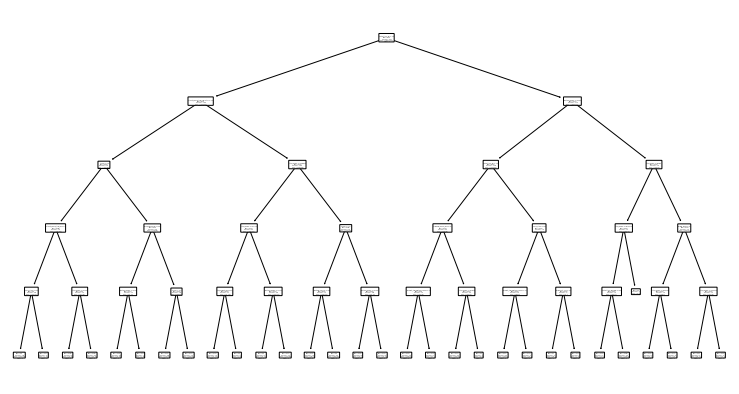

In [270]:
clf_5 = DecisionTreeClassifier(max_depth=5, random_state=123)
clf_5 = clf_5.fit(X_train, y_train)
plt.figure(figsize=(13, 7))
plot_tree(clf_5, feature_names=X_train.columns, class_names = clf.classes_.astype(str), rounded=True)

In [271]:
y_pred = clf_5.predict(X_train)
y_pred_proba = clf_5.predict_proba(X_train)

y_pred[0:5], y_pred_proba[0:5]

(array([0, 0, 0, 0, 0], dtype=uint8),
 array([[0.9701897 , 0.0298103 ],
        [0.9701897 , 0.0298103 ],
        [0.92083333, 0.07916667],
        [0.58823529, 0.41176471],
        [0.9701897 , 0.0298103 ]]))

In [272]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf_5.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.80


In [ ]:
print(classification_report(y_train, y_pred))

In [273]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(clf_5.score(X_validate, y_validate)))

Accuracy of Decision Tree classifier on validate set: 0.77


In [274]:
y_pred = clf_5.predict(X_validate)

print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85      1239
           1       0.62      0.37      0.46       449

    accuracy                           0.77      1688
   macro avg       0.71      0.64      0.66      1688
weighted avg       0.75      0.77      0.75      1688



Models with max depth of 3, 4, and 5 have the same accuracy on both train and validate. For simplicity, model 2 (max_depth = 3) is prefered. 

Takeaways - I'd like to do this model again and drop the total_charges column. Total_charges is highly dependent on tenure and I believe this is muddling the data. 